In [ ]:
# K-means CLustering
# perfomrs deivision of objects  into clusters which are similar between them
# and are "dissimilar" to the objects belonging to another cluster

In [ ]:
# If you want to group data base on the number of cluster  

In [ ]:
2 Types of cluster

In [ ]:
1. Hierarchical clustering => Clusters have a tree like structure or parent child relationship
a. Agglomerative -> "Bottom up" approach: Begin with each element as a separate cluster and merge them into successively larger clusters
b. Divisive -> "Top down" approach: Begins with the whole set and procced to divide it into successively smaller clusters

In [ ]:
2. Partitional clustering =>
a. K-Means -> Division of objects into clusters such that each objects is in exactly one cluster, not several 
b. Fuzzy C-Means -> Division of objects into clusters such that each objects can belong to multiple clusters

In [ ]:
Application of K-means Clustering
1. Academic performance
2. Diagnostic systems
3. Search engines
4. wireless sensor networks

In [ ]:
# Distance Measure => will determine the similarity between two elements and it will influence the shape of the clusters
1. Euclidean distance measure -> distance between two point
2. Squared Euclidean distance measure
3. Manhattan distance measure
4. Cosine distance measure

In [ ]:
K-Means Clustering

In [ ]:
# Problem statement
# Walmart want to open a chain of stores across Florida and
# want to find out optimal(best) store locations to maximize revenue

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set()
%matplotlib inline

In [ ]:
# Creating a data set

In [13]:
# Create cluster of dataset
from sklearn.datasets.samples_generator import make_blobs
X, y_true =make_blobs(n_samples= 400 , centers = 4,
                     cluster_std = 0.70 , random_state= 0)

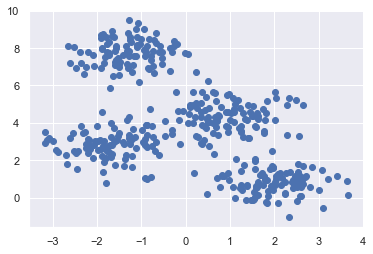

In [14]:
# X => represent location
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# base on scatter plot above, i decided to create 4 clusters

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [19]:
# predicted clusters
y_kmeans

array([3, 2, 2, 3, 2, 0, 1, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 2, 2, 2,
       0, 3, 3, 0, 0, 3, 3, 1, 3, 3, 2, 3, 2, 0, 1, 3, 1, 3, 2, 0, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 2,
       1, 3, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 3,
       2, 1, 2, 1, 3, 2, 2, 0, 3, 1, 1, 1, 0, 1, 3, 3, 2, 0, 3, 0, 1, 2,
       2, 2, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 3, 0, 1, 1, 1, 3, 0, 0,
       0, 2, 3, 2, 0, 3, 0, 2, 3, 2, 2, 0, 2, 1, 3, 2, 1, 2, 1, 3, 1, 3,
       0, 2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       3, 2, 3, 0, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3, 3, 0, 2, 0, 0, 0, 1,
       1, 3, 3, 2, 1, 1, 0, 3, 2, 0, 3, 0, 3, 3, 1, 1, 0, 1, 3, 0, 1, 0,
       2, 3, 0, 2, 3, 2, 1, 0, 3, 0, 3, 2, 3, 3, 0, 1, 2, 1, 3, 2, 1, 3,
       3, 0, 1, 3, 0, 3, 1, 2, 2, 1, 2, 3, 0, 0, 3, 3, 1, 0, 3, 2, 2, 2,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 3, 2, 0,

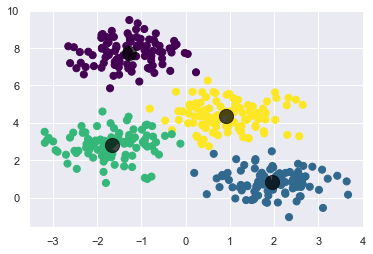

In [31]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X , n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 3. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 4. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0],X[:,1], c=y_kmeans , s=50, cmap ='viridis')
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.7)